# Natalia Palej A00279259
Software Design with Artificial Intelligence for Cloud Computing, Year 4

# Part 4: Comparative Analysis of Pokémon Distribution by Primary Type and Generation

In [172]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go

In [173]:
df = pd.read_pickle('data/final_cleaned_pokemon_data.pkl')

In [174]:
df.head()

,name,national_no,species,ev_yield,catch_rate,base_friendship,base_exp,growth_rate,egg_groups,egg_cycles,...,pokemon_img_url,height_m,weight_kg,primary_type,secondary_type,male_percentage,female_percentage,gen,primary_ability,secondary_ability
0,bulbasaur,1,Seed Pokémon,1 Sp. Atk,45.0,50.0,64,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/bulbasaur.jpg,0.7,6.9,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
1,ivysaur,2,Seed Pokémon,"1 Sp. Atk, 1 Sp. Def",45.0,50.0,142,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/ivysaur.jpg,1.0,13.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
2,venusaur,3,Seed Pokémon,"2 Sp. Atk, 1 Sp. Def",45.0,50.0,236,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/venusaur.jpg,2.0,100.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
3,charmander,4,Lizard Pokémon,1 Speed,45.0,50.0,62,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmander.jpg,0.6,8.5,fire,Pure,87.5,12.5,1,Blaze,Solar Power
4,charmeleon,5,Flame Pokémon,"1 Sp. Atk, 1 Speed",45.0,50.0,142,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmeleon.jpg,1.1,19.0,fire,Pure,87.5,12.5,1,Blaze,Solar Power


In [175]:
df.columns

Index(['name', 'national_no', 'species', 'ev_yield', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_groups',
       'egg_cycles', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed',
       'total', 'evo_path', 'pokemon_img_url', 'height_m', 'weight_kg',
       'primary_type', 'secondary_type', 'male_percentage',
       'female_percentage', 'gen', 'primary_ability', 'secondary_ability'],
      dtype='object')

## Data Organization

In [176]:
primary_type_count = df.groupby('gen')['primary_type'].value_counts().unstack(fill_value=0)
print(primary_type_count)

primary_type  bug  electric  fairy  fighting  fire  grass  ground  normal  \
gen                                                                         
1              10         2      2         5     7      9       4      11   
2               0         0      0         0     0      0       0       0   
3               0         0      0         0     0      0       0       0   
4               0         0      0         0     0      0       0       0   
5               0         0      0         0     0      0       0       0   
6               0         0      0         0     0      0       0       0   
7               0         0      0         0     0      0       0       0   
8               0         0      0         0     0      0       0       0   

primary_type  poison  psychic  rock  water  
gen                                         
1                 10        3     3     10  
2                  0        0     0      0  
3                  0        0     0      0  
4   

In [177]:
type_colors = {
    'grass': '#78C850', 'fire': '#F08030', 'water': '#6890F0',
    'bug': '#A8B820', 'normal': '#A8A878', 'poison': '#A040A0',
    'electric': '#F8D030', 'ground': '#E0C068', 'fairy': '#EE99AC',
    'fighting': '#C03028', 'flying': '#A890F0', 'psychic': '#F85888',
    'rock': '#B8A038', 'ghost': '#705898', 'ice': '#98D8D8',
    'dragon': '#7038F8', 'dark': '#705848', 'steel': '#B8B8D0',
}

## Grouped Bar Chart Creation

### Create Plotly Figure

In [178]:
bar_chart = go.Figure()
for ptype in primary_type_count.columns:
    bar_chart.add_trace(
        go.Bar(
            x=primary_type_count.index,  # Generations
            y=primary_type_count[ptype],  # Pokemon Count
            name=ptype,
            # Create custom hover info
            hoverinfo='text',
            hovertext=[f'Type: {ptype}<br>Total: {count}' for count in primary_type_count[ptype]],
            marker={'color': type_colors.get(ptype)},
        )
    )

### Add Vertical Dash Lines

In [179]:
for i in range(2, len(primary_type_count.index)+1):
    bar_chart.add_shape(
        type='line',
        x0=i-0.5, x1=i-0.5, 
        y0=0, y1=1,
        yref='paper',
        line=dict(color='gray', dash='dash')
    ) 

### Configure Bar Chart

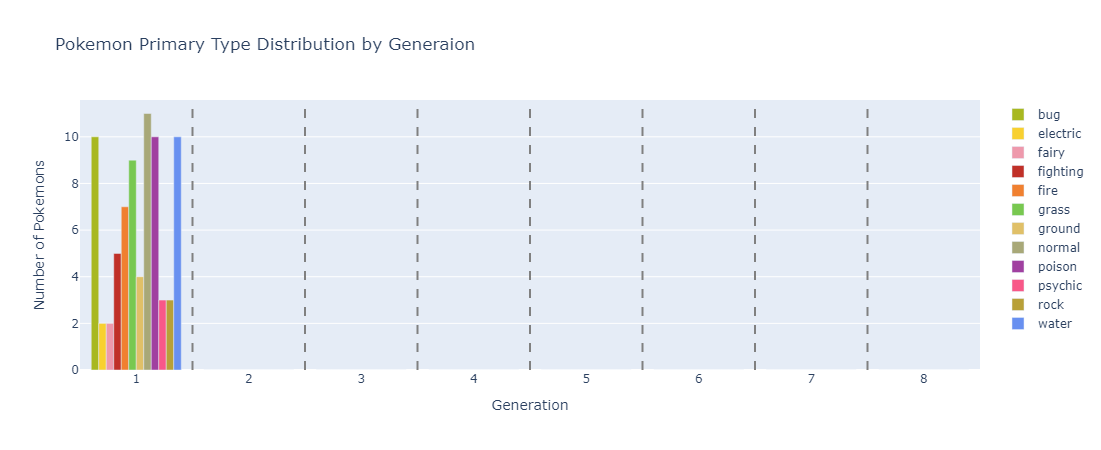

In [180]:
bar_chart.update_layout(
    title_text='Pokemon Primary Type Distribution by Generaion',
    xaxis_title='Generation',
    yaxis_title='Number of Pokemons',
    barmode='group',
    height=450,
    width=800
)

# Show the figure
bar_chart.show()

## Stacked Bar Chart Creation

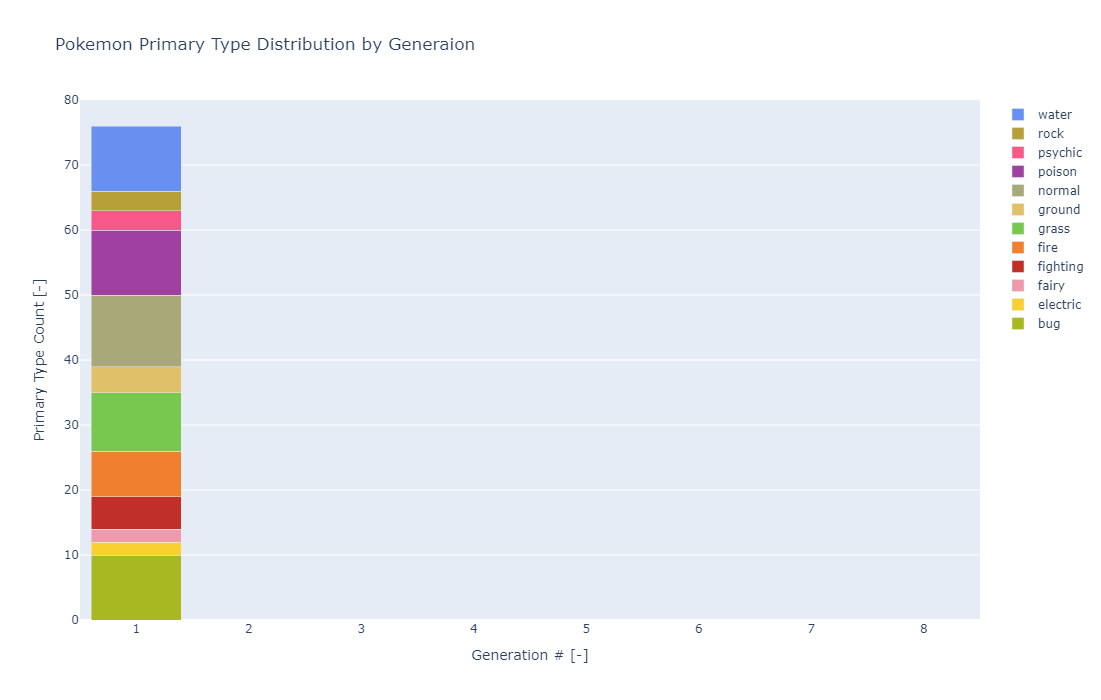

In [181]:
stack_chart = go.Figure()

for ptype in primary_type_count.columns:
    stack_chart.add_trace(go.Bar(
        x=primary_type_count.index,  
        y=primary_type_count[ptype],
        name=ptype,
        # Create custom hover info
        hoverinfo='text',
        hovertext=[f'Type: {ptype}<br>Total: {count}' for count in primary_type_count[ptype]],
        marker={'color': type_colors.get(ptype)}
        )
    )

stack_chart.update_layout(
    barmode='stack',
    title_text='Pokemon Primary Type Distribution by Generaion',
    xaxis_title='Generation # [-]',
    yaxis_title='Primary Type Count [-]',
    legend=dict(tracegroupgap=3),
    height=700, width=800
)

# Show the figure
stack_chart.show()

## Stacked Bar → Matrix Bar Chart Base Alignment

In [182]:
primary_type_count.columns

Index(['bug', 'electric', 'fairy', 'fighting', 'fire', 'grass', 'ground',
       'normal', 'poison', 'psychic', 'rock', 'water'],
      dtype='object', name='primary_type')

In [183]:
base_positions = {
    'bug': 20,
    'dark': 40,
    'dragon': 60,
    'electric': 80,
    'fairy': 100,
    'fighting': 120,
    'fire': 140,
    'flying': 160,
    'ghost': 180,
    'grass': 200,
    'ground': 220,
    'ice': 240,
    'normal': 260,
    'poison': 280,
    'psychic': 300,
    'rock': 320,
    'steel': 340,
    'water': 360,
}

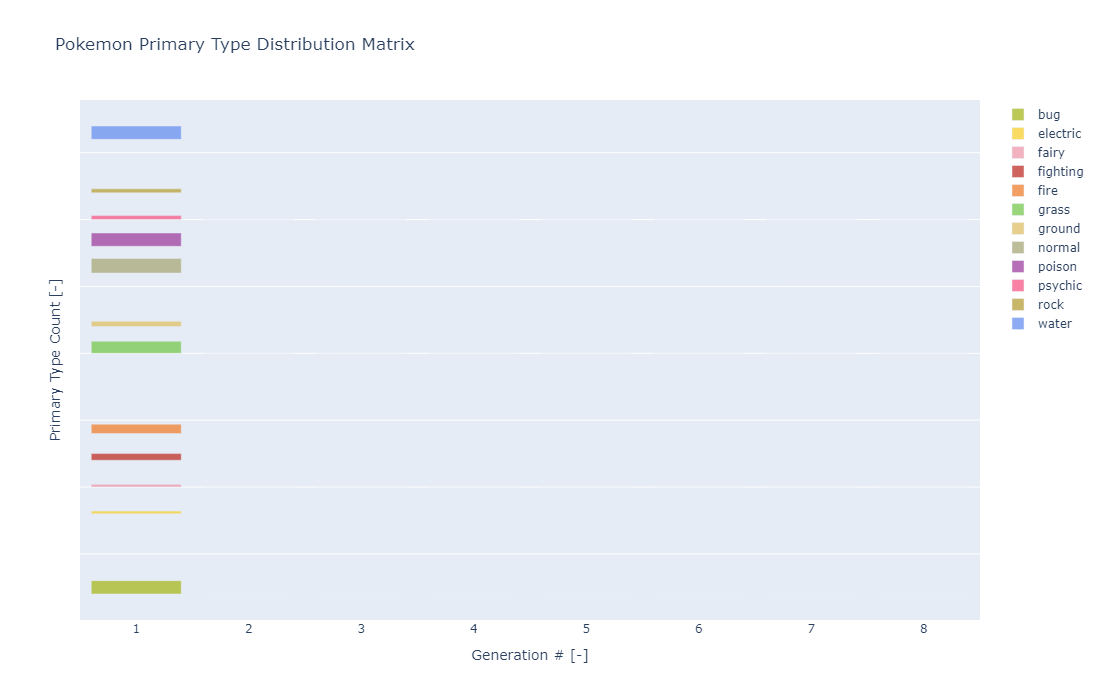

In [184]:
matrix_stack_chart = go.Figure()

for ptype in primary_type_count.columns: 
    matrix_stack_chart.add_trace(go.Bar(
        x=primary_type_count.index,  
        y=primary_type_count[ptype],
        name=ptype,
        # Create custom hover info
        hoverinfo='text',
        hovertext=[f'Type: {ptype}<br>Total: {count}' for count in primary_type_count[ptype]],
        marker={'color': type_colors.get(ptype)},
        # Set base and adjust opacity for overlap
        base=base_positions.get(ptype, 0),
        opacity=0.75
        )
    )

matrix_stack_chart.update_layout(
    barmode='overlay',
    title_text='Pokemon Primary Type Distribution Matrix',
    xaxis_title='Generation # [-]',
    yaxis_showticklabels=False,
    yaxis_title='Primary Type Count [-]',
    legend=dict(tracegroupgap=3),
    height=700, width=800
)

# Show the figure
matrix_stack_chart.show()

## Matrix Bar Plots and Utilizing the Negative Y-Axis for Additional Data Representation

In [185]:
total_count = df['gen'].value_counts()
sorted_types = sorted(primary_type_count.columns)
base_positions = {ptype: index * 20 for index, ptype in enumerate(sorted_types)}

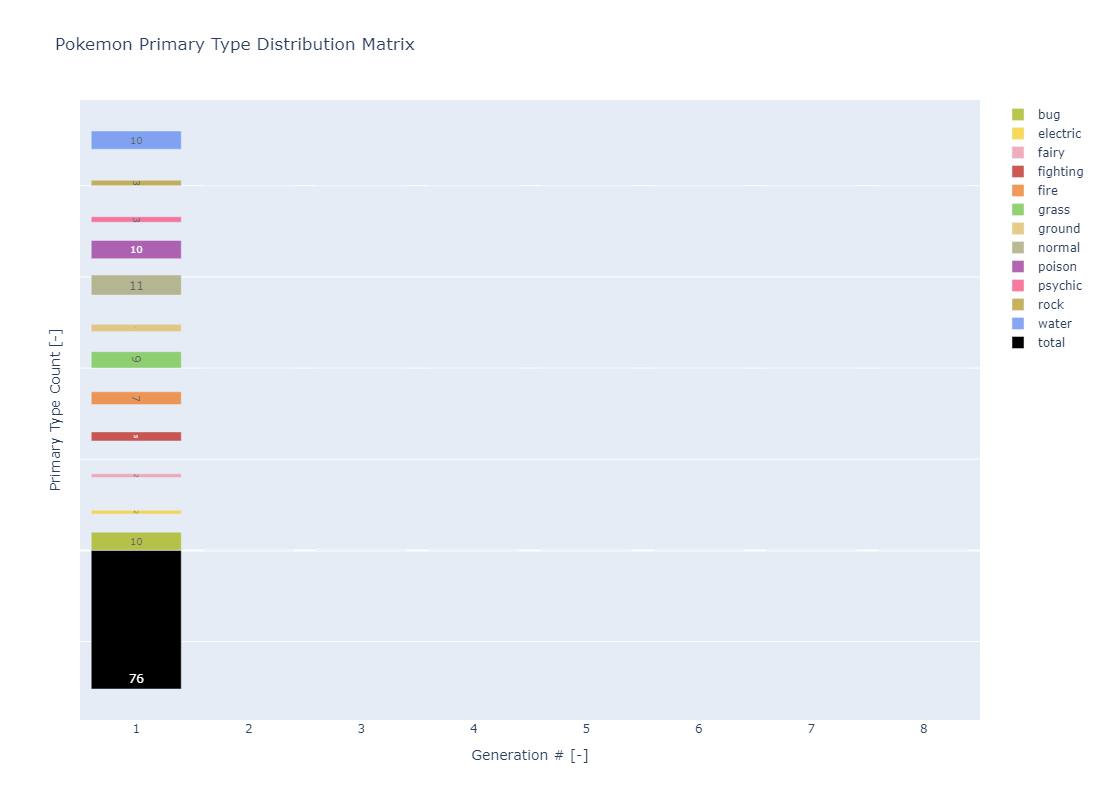

In [186]:
matrix_stack_chart2 = go.Figure()

for ptype in primary_type_count.columns: 
    matrix_stack_chart2.add_trace(go.Bar(
        x=primary_type_count.index,  
        y=primary_type_count[ptype],
        name=ptype,
        hoverinfo='text',
        hovertext=primary_type_count[ptype],
        marker={'color': type_colors.get(ptype)},
        base=base_positions[ptype],
        opacity=0.8,
        # Add total count per type inside each bar 
        text=primary_type_count[ptype].values,
        textposition='inside'
        )
    )

# Add total count on negative y-axis
matrix_stack_chart2.add_trace(go.Bar(
    x=total_count.index,
    # Negative values for total count
    y=-total_count.values,  
    name='total',
    marker_color='black',
    hoverinfo='text',
    text=total_count.values,
    textposition='auto'
))

matrix_stack_chart2.update_layout(
    barmode='overlay',
    title_text='Pokemon Primary Type Distribution Matrix',
    xaxis_title='Generation # [-]',
    yaxis_showticklabels=False,
    yaxis_title='Primary Type Count [-]',
    legend=dict(tracegroupgap=3),
    height=800, width=1000
)

# Show the figure
matrix_stack_chart2.show()